### Import Library

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import statsmodels.api as sm
import statistics
import scipy.stats
import warnings 

### Membaca Dataset

In [2]:
nyc_data = pd.read_csv('nyc-rolling-sales.csv')

### Preprocessing Dataset

###### Mengambil 5 data teratas dari dataset

In [3]:
nyc_data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


###### Mengambil 5 data terbawah dari dataset

In [4]:
nyc_data.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


###### Ringkasan mengenai dataset sehingga membantu analisis data untuk memahami dan membersihkan data.

In [5]:
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

###### Menghapus kolom unnamed: 0, EASE-MENT, APARTMENT NUMBER karena tidak diperlukan dalam menganalisis data

In [6]:
df = nyc_data.drop(["Unnamed: 0", "EASE-MENT", "APARTMENT NUMBER"], axis=1)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


###### Mengetahui dimensi atau jumlah baris dan kolom pada dataset

In [7]:
nyc_data.shape

(84548, 22)

###### Mengecek jumlah data yang duplikat

In [92]:
df.duplicated().sum()

765

###### Dataset memiliki 765 duplikat

###### Menghapus data duplikat

In [8]:
df.drop_duplicates(inplace=True)
print(sum(df.duplicated()))

0


In [9]:
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


###### Mengubah tipe data kolom sehingga sesuai dengan yang seharusnya

In [10]:
categoric = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categoric:
    df[col] = df[col].astype('category')

numeric = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         83783 non-null  int64         
 1   NEIGHBORHOOD                    83783 non-null  category      
 2   BUILDING CLASS CATEGORY         83783 non-null  category      
 3   TAX CLASS AT PRESENT            83783 non-null  category      
 4   BLOCK                           83783 non-null  int64         
 5   LOT                             83783 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83783 non-null  category      
 7   ADDRESS                         83783 non-null  object        
 8   ZIP CODE                        83783 non-null  int64         
 9   RESIDENTIAL UNITS               83783 non-null  int64         
 10  COMMERCIAL UNITS                83783 non-null  int64         
 11  TO

##### Mengecek missing value dataset

In [12]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

###### Diketahui terdapat missing value pada kolom 'LAND SQUARE FEET', 'GROSS SQUARE FEET', dan 'SALE PRICE'

###### Menghapus nilai missing value dengan nilai rata-rata

In [13]:
df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean(), inplace=True)
df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean(), inplace=True)
df['SALE PRICE'].fillna(df['SALE PRICE'].mean(), inplace=True)

###### Mengecek kembali nilai missing value

In [14]:
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

###### Dataset sudah tidak terdapat missing value sehingga dapat dilanjutkan anlisis berikutnya

###### Mengganti kode borough dengan menjadi string yaitu 1 untuk Manhattan, 2 untuk Bronx, 3 untuk Brooklyn, 4 untuk Queens, dan 5 untuk Staten Island

###### Menampilkan 5 data teratas

In [15]:
df['BOROUGH'] = df.BOROUGH.replace({1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Islands"})
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6.625000e+06,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,1.280703e+06,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,1.280703e+06,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3.936272e+06,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8.000000e+06,2016-11-17


###### Menampilkan 5 data terbawah

In [104]:
df.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,Staten Islands,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21
84547,Staten Islands,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,P9,155 CLAY PIT ROAD,10309,0,1,1,10796.0,2400.0,2006,4,P9,69300.0,2016-10-27


### Measure of Central Tendency 

#### Mean

##### Q : Bagaimana rata-rata Land Square Feet dan Gross Square Feet masing-masing wilayah dan bagaimana rata-rata harga penjualan dari masing-masing wilayah?

In [106]:
df.groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].mean()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
Bronx,3947.091502,4524.350262,5.901936e+05
Brooklyn,2166.259825,2570.354597,8.344884e+05
Manhattan,4114.800092,7150.756683,2.902477e+06
Queens,4167.674952,3568.246454,9.063757e+05
Staten Islands,7918.337390,2622.190827,7.525600e+05


###### 1. Berdasarkan tabel diatas diperoleh bahwa rata-rata Land Square Feet tertinggi terdapat di wilayah Staten island sebesar 7918.337390 dan rata-rata terendah di wilayah Brooklyn sebesar 2166.259825
###### 2. Rata-rata Gross square feet tertinggi berada di wilayah Manhattan sebesar 7150.756683 dan terendah di wilayah Brooklyn sebesar 2570.354597
###### 3. Rata-rata harga penjualan terbesar berada di wilayah Queens sebesar 9.063757e+05 dan terendah berada di wilayah Manhattan sebesar 2.902477e+06

#### Median

In [108]:
df.groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].median()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
Bronx,2375.000000,1760.000000,2.700000e+05
Brooklyn,1800.000000,1536.000000,4.200000e+05
Manhattan,3941.675775,4045.707479,1.276456e+06
Queens,3941.675775,2422.000000,7.450000e+05
Staten Islands,3941.675775,1800.000000,5.650000e+05


###### 1. Median/Nilai tengah terbesar Land Square Feet berada di wilayah Manhattan, Queens dan Staten Islands dengan nilai yang sama yaitu sebesar 3941.675775, nilai tengah terendah berada di wilayah Brooklyn sebesar 1800.000000 dan nilai tengah di wilayah Bronx sebesar 2375.000000.
###### 2. Nilai tengah dari Gross Square feet terbesar berada di wilayah Manhattan yaitu 4045.707479 dan terendah di Brooklyn sebesar 1536.000000.
###### 3. Nilai tengah dari harga penjualan terbesar adalah Queens yaitu 7.450000e+05 dan terendah di Manhattan sebesar 1.276456e+06

#### Mode (Modus)

##### Question : 
##### 1. Wilayah di NYC yang penjualan properti paling banyak?
##### 2. Bangunan dengan kategori mana yang paling banyak terjual
##### 3. Bangunan yang paling digunakan saat ini?
##### 4. Bangunan yang paling banyak terjual?

In [123]:
cols = ['BOROUGH','BUILDING CLASS CATEGORY', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE']
for col in cols:
    print("Modus "+col+" = ", df[col].mode()[0])

Modus BOROUGH =  Queens
Modus BUILDING CLASS CATEGORY =  01 ONE FAMILY DWELLINGS                    
Modus BUILDING CLASS AT PRESENT =  D4
Modus BUILDING CLASS AT TIME OF SALE =  R4


### Measure of Spread

#### Range

##### Q : Berapa range harga pejualan properti di NYC

In [129]:
print('Range SALE PRICE = ', (df['SALE PRICE'].max() - df['SALE PRICE'].min()))

Range SALE PRICE =  2210000000.0


#### Variance

##### Q : Berapa nilai variansi dari Land Square Feet, Gross Square Feet, dan harga penjualan terbesar dan terkecil pada wilayah di NYC

In [130]:
df.groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].var()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
Bronx,3.420048e+08,8.726635e+08,7.745411e+12
Brooklyn,1.980388e+08,2.348546e+08,1.549063e+13
Manhattan,2.673569e+07,1.400474e+09,4.587355e+14
Queens,1.389233e+09,1.155549e+09,7.274834e+12
Staten Islands,6.866474e+09,1.539069e+08,2.694457e+12


###### 1. Nilai variansi Land Square Feet terbesar terdapat pada Staten Islands yaitu 6.866474e+09 dan terendah di wilayah Manhattan yaitu 2.673569e+07
###### 2. Nilai variansi Gross Square Feet terbesar berada di wilayah Manhattan yaitu 1.400474e+09 dan terendah di wilayah Brooklyn sebesar 2.348546e+08
###### 3. Nilai variansi harga jual terbesar berada di wilayah Manhattan yaitu 4.587355e+14 dan terendah di wilayah staten islands yaitu sebesar 2.694457e+12

#### Standard Deviation

##### Q : Berapa nilai standar deviasi dari Land Square Feet, Gross Square Feet, dan harga penjualan terbesar dan terkecil pada wilayah di NYC

In [131]:
df.groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].std()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
Bronx,18493.371717,29540.878057,2.783058e+06
Brooklyn,14072.627073,15324.967190,3.935813e+06
Manhattan,5170.656325,37422.911692,2.141811e+07
Queens,37272.411205,33993.367954,2.697190e+06
Staten Islands,82864.192024,12405.921583,1.641480e+06


###### 1. Nilai standar deviasi Land Square Feet terbesar terdapat pada Queens yaitu 37272.411205 dan terendah di wilayah Manhattan yaitu 5170.656325
###### 2. Nilai standar deviasi Gross Square Feet terbesar berada di wilayah Manhattan yaitu 37422.911692 dan terendah di wilayah Staten islands sebesar 12405.921583
###### 3. Nilai standar deviasi harga jual terbesar berada di wilayah Manhattan yaitu 2.141811e+07 dan terendah di wilayah staten islands yaitu sebesar 1.641480e+06

### Probability Ditribution

##### Q : Bagaimana Probability Distribution dari block?

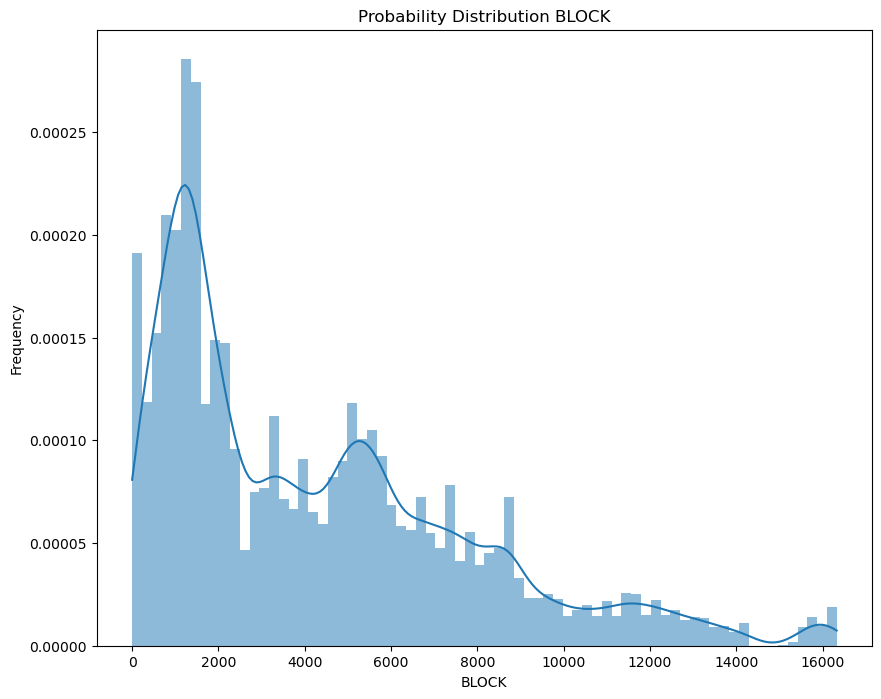

In [49]:
data_block = df['BLOCK']
plt.figure(figsize=(10,8))
sns.histplot(data = data_block,
             kde=True, 
             stat="density", 
             linewidth=0)
plt.title("Probability Distribution BLOCK")
plt.xlabel("BLOCK")
plt.ylabel("Frequency")
plt.show()

In [50]:
from scipy import stats

lsf = df['BLOCK']

ks_statistic, p_value = stats.kstest(lsf, 'norm') 

print("KS-statistic:", ks_statistic)
print("p-value:", p_value)

KS-statistic: 0.9996297098871054
p-value: 0.0


###### Grafik diatas menunjukkan distribusi probabilitas tidak normal karena nilai p-value < 0.05 dan memiliki skewnes positif karena ekor di sisi kanan kurva lebih panjang daripada di kiri

### Confidence Intervals

#### Q : Berapa convidence intervals dari rata-rata sale price NYC?

In [53]:
data = df['SALE PRICE']
mean = data.mean()
std_dev = data.std()
jumlah_properti = len(data)
z_score = 1.96 #untuk tingkat kepercayaan 95%
standart_eror = std_dev/np.sqrt(jumlah_properti)

lower = mean - z_score*standart_eror
upper = mean + z_score*standart_eror

print("Confidence Interval (95%) dari dataset:", (lower, upper))

Confidence Interval (95%) dari dataset: (1210154.7633181561, 1351251.237285232)


###### Didapatkan bahwa rata-rata sale price area NYC adalah berada diantara 1210154.763318156 sampai 1351251.237285232 dengan convidence interval sebesar 95%

### Hypothesis Testing

#### Apakah rata-rata harga jual pada wilayah Brooklyn berbeda secara signifikan dengan wilayah Staten Islands?
##### H0 : rata-rata harga jual di wilayah Brooklyn sama dengan rata-rata harga jual di wilayah Staten Islands
##### H1 : rata-rata harga jual di wilayah Brooklyn tidak sama atau berbeda dengan rata-rata harga jual di wilayah Staten Islands

In [66]:
sales_Staten = df[df["BOROUGH"] == 'Staten Islands']
sales_brooklyn = df[df["BOROUGH"] == 'Brooklyn']

jumlah_sales_staten= len(sales_Staten)
mean_staten = sales_Staten["SALE PRICE"].mean()
std_dev_staten = sales_Staten["SALE PRICE"].std()
print(jumlah_sales_staten, mean_staten, std_dev_staten)


jumlah_sales_brooklyn= len(sales_brooklyn)
mean_brooklyn = sales_brooklyn["SALE PRICE"].mean()
std_dev_brooklyn = sales_brooklyn["SALE PRICE"].std()
print(jumlah_sales_brooklyn, mean_brooklyn, std_dev_brooklyn)


8296 748852.570238297 1651992.1972784959
23843 841083.3950845111 3951911.835186454


In [67]:
sm.stats.ztest(sales_brooklyn["SALE PRICE"].dropna(),
               sales_bronx["SALE PRICE"].dropna(),
              alternative='two-sided')

(-2.0638725230058794, 0.03902980456870157)

###### Nilai p-value adalah 0.03 < 0.05 sehingga H0 ditolak dan H1 diterima atau rata-rata harga jual di wilayah Brooklyn tidak sama dengan rata-rata harga jual di wilayah Staten Islands

### Kesimpulan

###### Dari dataset diatas dan analisis yang telah dilakukan, dapat disimpulkan :
###### 1. Rata-rata harga penjualan tertinggi berada di wilayah Queens dan terendah di wilayah Manhattan dengan range harga 2210000000.
###### 2. Wilayah dengan penjualan property terbanyak berada di Queens dengan kategori bangunan 01 One Family Dwellings dan bangunan yang paling banyak digunakan saat ini adalah D4 serta bangunan yang secara keseluruhan paling banyak terjual adalah R4
###### 3. Distrubsi peluang dari Block tidak normal dan memiliki skewness positif
###### 4. Dengan hypothesis testing diketahui bahwa rata-rata harga jual di wilayah Brooklyn tidak sama dengan rata-rata harga jual di wilayah Staten Islands.
